<a href="https://colab.research.google.com/github/vasudhab21/ML-LAB/blob/main/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A1

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd

In [76]:
# Extracting file
df = pd.read_excel("/content/drive/MyDrive/Lab Session Data.xlsx", sheet_name="Purchase data")

In [5]:
df_A = df.iloc[:, 1:4]
A = df_A.values
A

array([[20,  6,  2],
       [16,  3,  6],
       [27,  6,  2],
       [19,  1,  2],
       [24,  4,  2],
       [22,  1,  5],
       [15,  4,  2],
       [18,  4,  2],
       [21,  1,  4],
       [16,  2,  4]])

In [6]:
df_C = df.iloc[:, 4:5]
C = df_C.values
C

array([[386],
       [289],
       [393],
       [110],
       [280],
       [167],
       [271],
       [274],
       [148],
       [198]])

In [7]:
# Dimensionality of vector space
A.shape[1]

3

In [8]:
# Number of vectors in vector space
A.shape[0]

10

In [9]:
# Rank of Matrix A
np.linalg.matrix_rank(A)

np.int64(3)

In [10]:
# Cost of each product
X = np.linalg.pinv(A) @ C
X

array([[ 1.],
       [55.],
       [18.]])

A2

In [11]:
payments = df['Payment (Rs)']
for payment in payments:
  if payment>200:
    print("Rich")
  else:
    print("Poor")

Rich
Rich
Rich
Poor
Rich
Poor
Rich
Rich
Poor
Poor


A3

In [12]:
import statistics

In [13]:
# Extracting the file
df1 = pd.read_excel("/content/drive/MyDrive/Lab Session Data.xlsx", sheet_name="IRCTC Stock Price")

In [14]:
# Calculating mean of Price
mean_price = df1['Price'].mean()
mean_price

np.float64(1560.6634538152612)

In [15]:
# Calculating variance of Price
df1['Price'].var()

58732.36535253922

In [55]:
# Price data for Wednesdays
wed_price = df1[df1['Day']=="Wed"]["Price"]

# Mean of prices on Wednesdays
def mean_wed():
  return wed_price.mean()

wed_mean = mean_wed()
print("Wednesday mean:", wed_mean)

# Comparing mean
if mean_price>wed_mean:
  print("Population mean is greater than sample mean")
else:
  print("Population mean is less than sample mean")

Wednesday mean: 1550.7060000000001
Population mean is greater than sample mean


In [54]:
# Price data for April
april_price = df1[df1['Month']=="Apr"]["Price"]

# Mean of prices in April
def mean_april(data):
  return april_price.mean()

april_mean = mean_april(april_price)
print("April mean:", april_mean)
# Comparing mean
if mean_price>april_mean:
  print("Population mean is greater than sample mean")
else:
  print("Population mean is less than sample mean")

April mean: 1698.9526315789474
Population mean is less than sample mean


In [51]:
# Probability of making a loss over the stock
# Filter the chg% that are negative
loss = list(filter(lambda x: x<0,df1['Chg%']))
# Calculate the probability of loss
def probability_loss(loss, df1):
  return len(loss)/len(df1['Chg%'])
print("Probability of loss:",probability_loss(loss, df1))

Probability of loss: 0.4979919678714859


In [52]:
# Probability of making a profit on Wednesday
# Filter the chg% that are negative and occur on Wednesdays
wed_price1 = df1[df1['Day']=="Wed"]["Chg%"]
profit = list(filter(lambda x: x>0, wed_price1))
# Calculate the probability of profit
def probability_profit(profit, wed_price1):
  return len(profit)/len(df1['Chg%'])
print("Probability:",probability_profit(profit, wed_price1))

Probability: 0.08433734939759036


In [20]:
# Conditional probability of making a profit given that today is Wednesday
# Filter the chg% that are negative and occur on Wednesdays
wed_price1 = df1[df1['Day']=="Wed"]["Chg%"]
profit = list(filter(lambda x: x>0, wed_price1))
# Calculate the probability of profit
def conditional_prob(profit, wed_price1):
  return len(profit)/len(wed_price1)
print("Conditional Probability:",conditional_prob(profit, wed_price1))

Conditional Probability: 0.42


Text(0.5, 1.0, 'Scatter plot of Chg% against day of week')

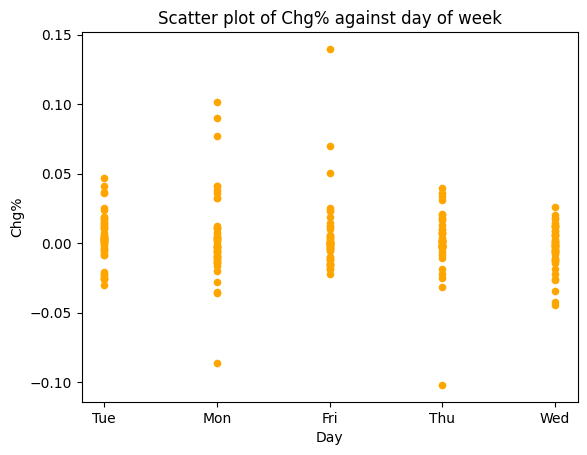

In [21]:
# Scatter plot of Chg% against day of week
import matplotlib.pyplot as plt
df1.plot.scatter(x='Day', y='Chg%', color='orange')
plt.title('Scatter plot of Chg% against day of week')

A4

In [77]:
# Extracting the file
df2 = pd.read_excel("/content/drive/MyDrive/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

In [71]:
# Identifying the datatype(nominal etc)
df2.dtypes

,0
Record ID,int64
age,int64
sex,object
on thyroxine,object
query on thyroxine,object
on antithyroid medication,object
sick,object
pregnant,object
thyroid surgery,object
I131 treatment,object


In [62]:
# Identifying the encoding scheme to be employed
for col in df2.select_dtypes(include='object').columns:
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) <= 5:
      print("Label Encoding")
    else:
      print("One-Hot Encoding")

Label Encoding
Label Encoding
Label Encoding
Label Encoding
Label Encoding
Label Encoding
Label Encoding
Label Encoding
Label Encoding
Label Encoding
Label Encoding
Label Encoding
Label Encoding
Label Encoding
Label Encoding
Label Encoding
One-Hot Encoding
Label Encoding
One-Hot Encoding
Label Encoding
One-Hot Encoding
Label Encoding
One-Hot Encoding
Label Encoding
One-Hot Encoding
Label Encoding
One-Hot Encoding
One-Hot Encoding
One-Hot Encoding


In [72]:
# Studying the data range for numeric variables
df.describe()

,Record ID,age,TSH,T3,TT4,T4U,FTI,TBG
count,9.172000e+03,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000
mean,8.529473e+08,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057
std,7.581969e+06,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504
min,8.408010e+08,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000
25%,8.504090e+08,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000
50%,8.510040e+08,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000
75%,8.607110e+08,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000
max,8.701190e+08,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [26]:
# Studying the presence of missing values in each attribute
if df2.isin(['?']).any().any():
  print("Missing values")
else:
  print("No missing values")

Missing values


In [73]:
# Studying the presence of outliers
numeric_df = df.select_dtypes(include=[np.number])
z_scores = numeric_df.apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print(outliers)

Record ID    0
age          3
TSH          0
T3           0
TT4          0
T4U          0
FTI          0
TBG          0
dtype: int64


In [75]:
# Computing mean and variance for numeric data
numeric_df = df.select_dtypes(include=[np.number])
print("Mean:", numeric_df.mean())
print("Variance:", numeric_df.var())

Mean: Record ID    8.529473e+08
age          7.355582e+01
TSH          5.218403e+00
T3           1.970629e+00
TT4          1.087003e+02
T4U          9.760557e-01
FTI          1.136407e+02
TBG          2.987006e+01
dtype: float64
Variance: Record ID    5.748625e+13
age          1.401801e+06
TSH          5.848662e+02
T3           7.877962e-01
TT4          1.407951e+03
T4U          4.014431e-02
FTI          1.726540e+03
TBG          4.443876e+02
dtype: float64


A5

In [27]:
obs = df2.iloc[:2]
# Find columns with only 't', 'f', 'T', or 'F' values
binary_cols = [
    col for col in df2.columns
    if df2[col].astype(str).str.lower().isin(['t', 'f']).all()
]

# Convert false values to '0' and true values to '1'
v1 = df2.loc[0, binary_cols].astype(str).str.lower().replace({'t': 1, 'f': 0}).astype(int)
v2 = df2.loc[1, binary_cols].astype(str).str.lower().replace({'t': 1, 'f': 0}).astype(int)

# Attributes
f11 = ((v1 == 1) & (v2 == 1)).sum()
f00 = ((v1 == 0) & (v2 == 0)).sum()
f10 = ((v1 == 1) & (v2 == 0)).sum()
f01 = ((v1 == 0) & (v2 == 1)).sum()

# Jaccard Coefficient
def Jaccard_Coefficient(f00, f01, f10, f11):
  return f11 / (f01 + f10 + f11)

# Simple Matching Coefficient
def Simple_Matching_Coefficient(f00, f01, f10, f11):
  return (f11 + f00) / (f00 + f01 + f10 + f11)

print("Jaccard Coefficient:", Jaccard_Coefficient(f00, f01, f10, f11))
print("Simple Matching Coefficient:", Simple_Matching_Coefficient(f00, f01, f10, f11))

Jaccard Coefficient: 0.25
Simple Matching Coefficient: 0.85


/tmp/ipython-input-27-230570292.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  v1 = df2.loc[0, binary_cols].astype(str).str.lower().replace({'t': 1, 'f': 0}).astype(int)
/tmp/ipython-input-27-230570292.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  v2 = df2.loc[1, binary_cols].astype(str).str.lower().replace({'t': 1, 'f': 0}).astype(int)


A6

In [28]:
# Loading the data
df2 = pd.read_excel("/content/drive/MyDrive/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

# Replacing '?' with NaN and convert to numeric
df2_clean = df2.replace("?", np.nan)
df2_clean = df2_clean.apply(pd.to_numeric, errors='coerce')

# Filling missing values
df2_clean = df2_clean.fillna(0)

# Extracting first two rows
A = df2_clean.iloc[0].values
B = df2_clean.iloc[1].values

# Cosine similarity
def Cosine_Similarity(A,B):
  dot_product = np.dot(A, B)
  norm_A = np.linalg.norm(A)
  norm_B = np.linalg.norm(B)

  return dot_product / (norm_A * norm_B)

print("Cosine Similarity:", Cosine_Similarity(A,B))

Cosine Similarity: 0.9999999999999885


/tmp/ipython-input-28-2364926863.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2_clean = df2.replace("?", np.nan)


A7

/tmp/ipython-input-78-337702851.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean = df2.replace("?", np.nan)


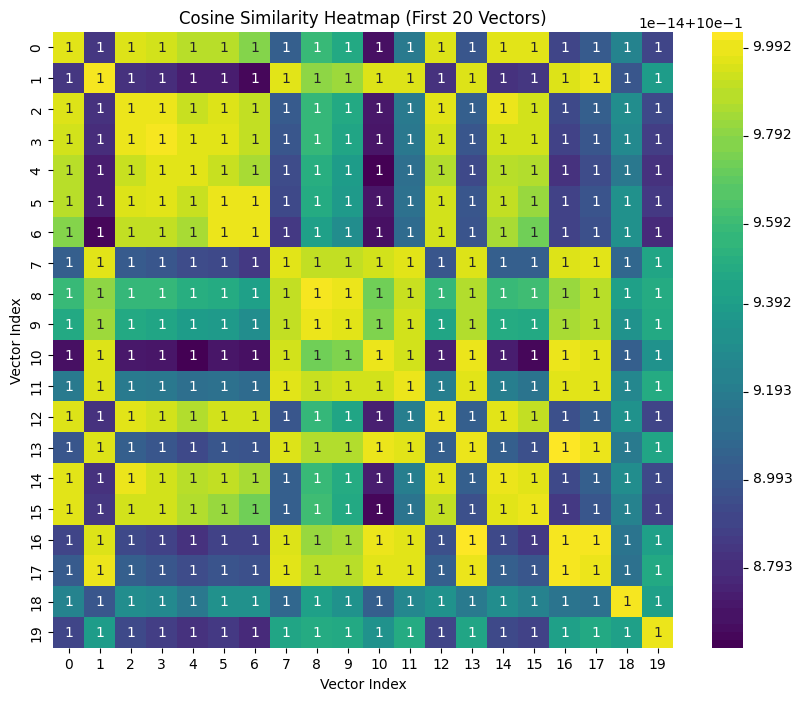

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loading and cleaning data
df2 = pd.read_excel("/content/drive/MyDrive/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")
df_clean = df2.replace("?", np.nan)
df_clean = df_clean.apply(pd.to_numeric, errors='coerce')
df_clean = df_clean.fillna(0)

# Excluding non-numeric columns for cosine similarity
numeric_cols = df_clean.select_dtypes(include=np.number).columns
df_clean_numeric = df_clean[numeric_cols]

# Use only first 20 rows
df_20 = df_clean_numeric.iloc[:20]

# Compute cosine similarity
def cosine_similarity(a, b):
    dot = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    # Handling the case where norm is zero to avoid division by zero
    if norm_a == 0 or norm_b == 0:
        return 0.0
    return dot / (norm_a * norm_b)

# Create 20x20 similarity matrix
cos_sim_matrix = np.zeros((20, 20))

for i in range(20):
    for j in range(20):
        cos_sim_matrix[i][j] = cosine_similarity(df_20.iloc[i], df_20.iloc[j])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix, annot=True, cmap='viridis')
plt.title("Cosine Similarity Heatmap (First 20 Vectors)")
plt.xlabel("Vector Index")
plt.ylabel("Vector Index")
plt.show()

A8

In [79]:
# Loading the dataset
df = pd.read_excel("/content/drive/MyDrive/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

# Replace '?' with NaN and handle type inference
df = df.replace('?', np.nan)

# Convert to numeric
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

# Data Imputation
def Data_Imputation(dataframe):
  for col in df.columns:
      if df[col].dtype == 'object':
          # Mode
          df[col] = df[col].fillna(df[col].mode()[0])
      else:
          # Z-score to check for outliers
          z = (df[col] - df[col].mean()) / df[col].std()
          # Median
          if z.abs().gt(3).any():
              df[col] = df[col].fillna(df[col].median())
          else:
            # Mean
              df[col] = df[col].fillna(df[col].mean())

Data_Imputation(df)
# Saving the cleaned dataset
df.to_excel("thyroid0387_UCI_cleaned.xlsx", index=False)

df.head()

/tmp/ipython-input-79-4015540078.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('?', np.nan)


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,840801013,29,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
1,840801014,29,F,f,f,f,f,f,f,f,...,t,128.0,f,0.96,f,109.0,f,26.0,other,NO CONDITION
2,840801042,41,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,11.0,other,NO CONDITION
3,840803046,36,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,26.0,other,NO CONDITION
4,840803047,32,F,f,f,f,f,f,f,f,...,f,104.0,f,0.96,f,109.0,t,36.0,other,S


A9

In [60]:
# Loading the dataset
df = pd.read_excel("/content/drive/MyDrive/Lab Session Data.xlsx", sheet_name="thyroid0387_UCI")

# Replacing '?' with NaN
df = df.replace('?', np.nan)

# Converting columns to numeric
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except:
        pass

def normalization(dataframe):
  # Normalizing numeric values using Min-Max scaling
  for col in df.select_dtypes(include=[np.number]).columns:
      col_min = df[col].min()
      col_max = df[col].max()
      df[col] = (df[col] - col_min) / (col_max - col_min)
normalization(df)

# Saving the normalized data
df.to_excel("thyroid0387_UCI_normalized.xlsx", index=False)

df.head()

/tmp/ipython-input-60-992944488.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace('?', np.nan)


,Record ID,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,...,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,Condition
0,0.000000e+00,0.000427,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,f,NaN,other,NO CONDITION
1,3.410871e-08,0.000427,F,f,f,f,f,f,f,f,...,t,0.210702,f,NaN,f,NaN,f,NaN,other,NO CONDITION
2,9.891527e-07,0.000610,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,0.054527,other,NO CONDITION
3,6.934301e-05,0.000534,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,0.129565,other,NO CONDITION
4,6.937712e-05,0.000473,F,f,f,f,f,f,f,f,...,f,NaN,f,NaN,f,NaN,t,0.179590,other,S
